In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import collections
!python -m spacy download en_core_web_sm
import seaborn as sns

In [ ]:
unnormalised_dataset  = open('/content/drive/MyDrive/Benkyou/Text Evaluation/newdataset.txt','r').read()
unnormalised_dataset

'Sun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\nSun Rises in East.\n'

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
#print(nlp(unnormalised_dataset))
displacy.render(nlp(unnormalised_dataset), jupyter=True, options={'distance': 90},style='dep')
plt.show()

In [ ]:
import re
def normalize_text(text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    #text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    
    return text

In [ ]:
dataset = normalize_text(unnormalised_dataset)

In [ ]:
def create_cloud(data):
  cloud  = WordCloud(background_color ='white',max_words= 100,stopwords=set(STOPWORDS))
  cloud.generate(data)
  plt.imshow(cloud)
  plt.show()

In [ ]:
dataset = dataset.lower()

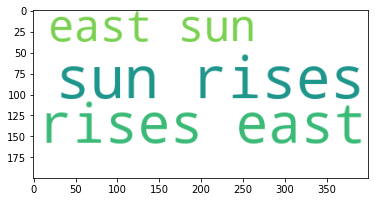

In [ ]:
create_cloud(dataset)

In [ ]:
def Lemmatizer(text):
  lemmatizer = WordNetLemmatizer()
  tokens=[lemmatizer.lemmatize(word) for word in text]
  return tokens


In [ ]:
def Stemming(text):
  ps = PorterStemmer()
  tokens=[ps.stem(word) for word in text]
  print(tokens)

In [ ]:
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(dataset)
text_without_stopwords = [x for x in text_tokens if x not in stopwords]


In [ ]:
Stemming(text_without_stopwords)

['sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east', 'sun', 'rise', 'east']


In [ ]:
text_without_stopwords=Lemmatizer(text_without_stopwords)

In [ ]:
word_count = collections.Counter(text_without_stopwords).most_common()
word_count

[('sun', 36), ('rise', 36), ('east', 36)]

In [ ]:
feature = [word_count[i][0] for i in range(len(word_count))]
feature

['sun', 'rise', 'east']

In [ ]:
#training_examples
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(text_without_stopwords)

In [ ]:
#bow.todense()

In [ ]:
import pandas as pd

feature_names = vectorizer.get_feature_names()
corpus_index = [n for n in text_without_stopwords]

data = pd.DataFrame(bow.todense(), index=corpus_index, columns=feature_names)
data.head(6)

,east,rise,sun
sun,0,0,1
rise,0,1,0
east,1,0,0
sun,0,0,1
rise,0,1,0
east,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


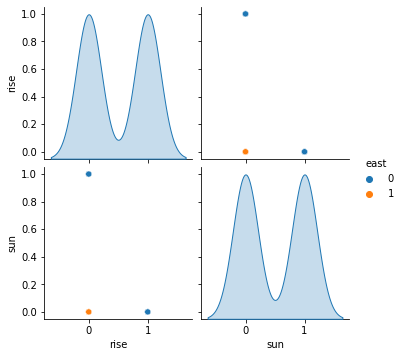

In [ ]:
sns.pairplot(data,hue='east')
plt.show()

In [ ]:
text ='''sun rises in west.
        sun rises in east
        sun rises in north'''
text

'sun rises in west.\n        sun rises in east\n        sun rises in north'


1)Normalize
2)tokenize and Remove  Stopwords
3) Stemming alg / Lemmatize
4)Vectorize
5)Feature_frequency 
6)DataFrame

In [ ]:
test = normalize_text(text)
test

'sun rises in west sun rises in east sun rises in north'

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
#print(nlp(unnormalised_dataset))
displacy.render(nlp(text), jupyter=True, options={'distance': 90},style='dep')
plt.show()

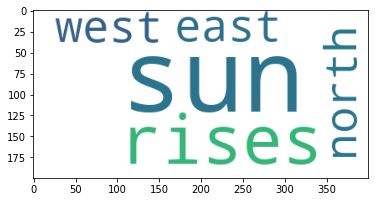

In [ ]:
create_cloud(test)

In [ ]:
test = word_tokenize(test)
test

['sun',
 'rises',
 'in',
 'west',
 'sun',
 'rises',
 'in',
 'east',
 'sun',
 'rises',
 'in',
 'north']

In [ ]:
test = [x for x in test if x not in stopwords]
test

['sun', 'rises', 'west', 'sun', 'rises', 'east', 'sun', 'rises', 'north']

In [ ]:
test = Lemmatizer(test)
test

['sun', 'rise', 'west', 'sun', 'rise', 'east', 'sun', 'rise', 'north']

In [ ]:
def counter(list):
  list1=[]
  list3=[]
  for i in list:
    list2=[]
    if i not in list3:
      list3.append(i)
      list2.append(i)
      list2.append(list.count(i))
      list1.append(tuple(list2))

  return list1


In [ ]:
test_sample =counter(test)
test_sample

[('sun', 3), ('rise', 3), ('west', 1), ('east', 1), ('north', 1)]

In [ ]:
vc_test=vectorizer.transform(test)
print(vc_test.todense())

[[0 0 1]
 [0 1 0]
 [0 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 0]]


In [ ]:
feature_test = vectorizer.get_feature_names()
test_index = [n for n in test]
df = pd.DataFrame(vc_test.todense(), index=test_index, columns=feature_test)
df.head()

,east,rise,sun
sun,0,0,1
rise,0,1,0
west,0,0,0
sun,0,0,1
rise,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


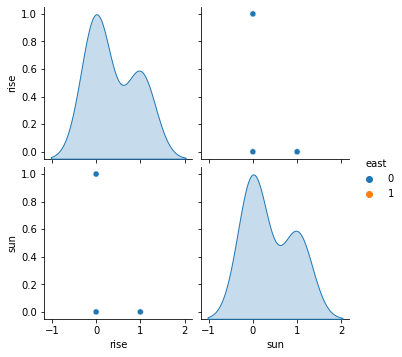

In [ ]:
sns.pairplot(df,hue='east')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
Bnb = GaussianNB()

In [ ]:
list=data.columns.to_list()
list.remove('east')
x= data[list]
y =data['east']

In [ ]:
Bnb.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
testx = df[list]


In [ ]:
pred=pd.DataFrame(data=Bnb.predict(testx),columns=['east'])
pred

,east
0,0
1,0
2,1
3,0
4,0
5,1
6,0
7,0
8,1


In [ ]:
df['east']

sun      0
rise     0
west     0
sun      0
rise     0
east     1
sun      0
rise     0
north    0
Name: east, dtype: int64